In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [4]:
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [5]:
df.rename(columns={'328':'months_as_customer','48':'age','521585':'policy_number','17-10-2014':'policy_bind_date','OH':'policy_state','250/500':'policy_csl',
                  '1000':'policy_deductable','1406.91':'policy_annual_premium','0':'umbrella_limit','466132':'insured_zip','MALE':'insured_sex','MD':'insured_education_level',
                  'craft-repair':'insured_occupation','sleeping':'insured_hobbies','husband':'insured_relationship','53300':'capital-gains','0.1':'capital-loss',
                  '25-01-2015':'incident_date','Single Vehicle Collision':'incident_type','Side Collision':'collision_type','Major Damage':'incident_severity',
                  'Police':'authorities_contacted','SC':'incident_state','Columbus':'incident_city','9935 4th Drive':'incident_location',
                  '5':'incident_hour_of_the_day','1':'number_of_vehicles_involved','YES':'property_damage','1.1':'bodily_injuries','2':'witnesses',
                  'YES.1':'police_report_available','71610':'total_claim_amount','6510':'injury_claim','13020':'property_claim','52080':'vehicle_claim',
                  'Saab':'auto_make','92x':'auto_model','2004':'auto_year','Y':'fraud_reported'},inplace=True)

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
df.shape

(999, 39)

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


1.This gives the statistical summary of numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values are present. 
2.In this dataset count of columns are not same,which means there is missing values are present. 
3.The median(50%) is less than mean which means skewness is preset
4.By summarizing the data there is diff between 75% and max Which means outliers are present

# Checking for null values

In [11]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

<Axes: >

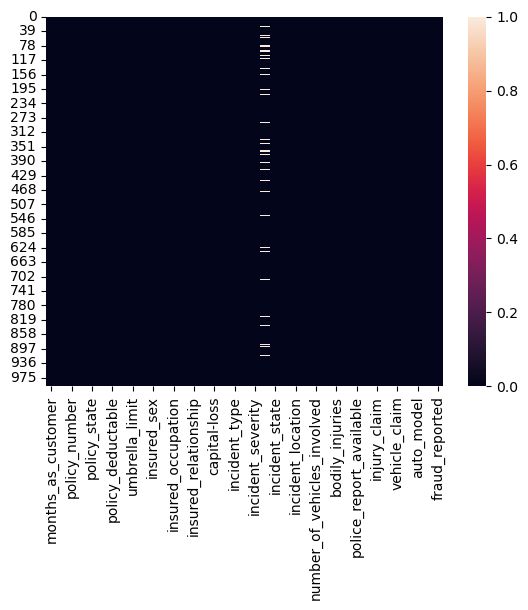

In [12]:
sns.heatmap(df.isnull())

We can clearly visualice that null values are present inthis dataset.

In [13]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       291
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [14]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)

<Axes: >

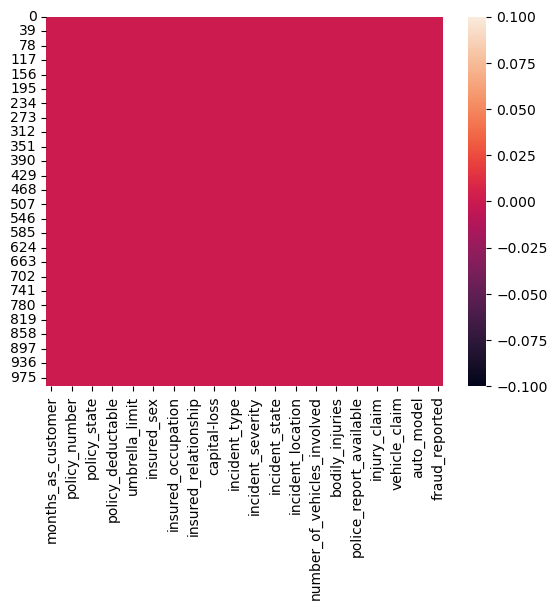

In [15]:
sns.heatmap(df.isnull())

In [16]:
#checking for value counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
230    7
140    7
101    7
128    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
30    42
38    42
31    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
42    32
36    32
44    32
28    30
45    26
26    26
47    24
48    24
27    24
57    16
49    14
25    14
55    14
50    13
53    13
54    10
24    10
61    10
60     9
51     9
56     8
58     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
342868    1
757644    1
223404    1
991480    1
804219    1
         ..
620855    1
583169    1
337677    1
445973    1
556080    1
Name: count, Length: 999, dtype: int64


policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: count, Le

In [17]:
df.nunique()

months_as_customer             391
age                             46
policy_number                  999
policy_bind_date               950
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  11
insured_zip                    994
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            4
incident_state                   7
incident_city                    7
incident_location              999
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries     

In [18]:
df.duplicated().sum()

0

# Numerical columns seperating

In [19]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print("Numericol columns:",num_cols)

Numericol columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


# Checking for categorical columns

In [20]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print("Categorical columns:",cat_cols)

Categorical columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


([<matplotlib.patches.Wedge at 0x1795dd970d0>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Categorical'),
  Text(0.13259054489339886, -1.0919797376347566, 'Continuous')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.8%'),
  Text(0.07232211539639936, -0.5956253114371399, '46.2%')])

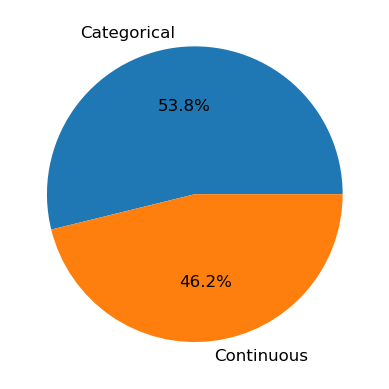

In [21]:
plt.pie([len(cat_cols),len(num_cols)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')


fraud_reported
N    753
Y    246
Name: count, dtype: int64

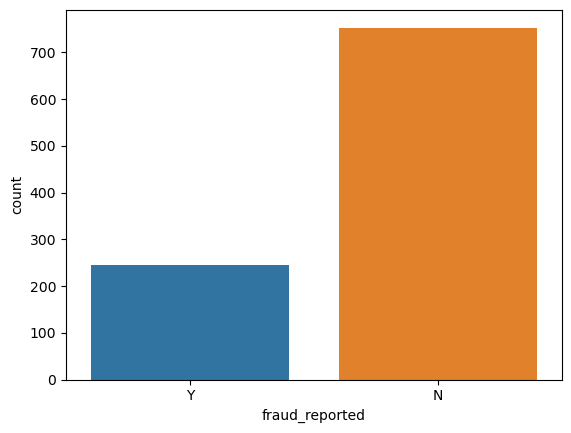

In [22]:
sns.countplot(x='fraud_reported',data=df)
df['fraud_reported'].value_counts()

<Axes: xlabel='age', ylabel='Density'>

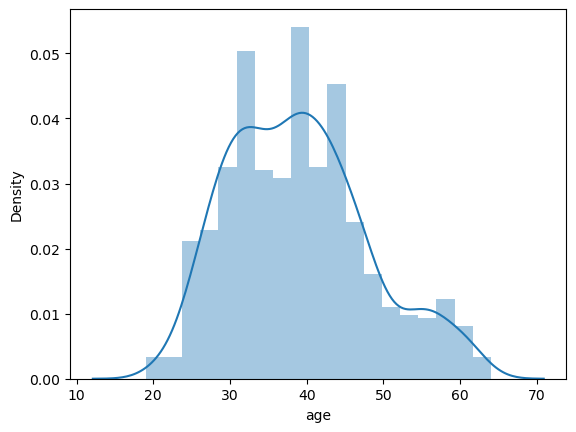

In [23]:
sns.distplot(df['age'])

<Axes: xlabel='fraud_reported', ylabel='age'>

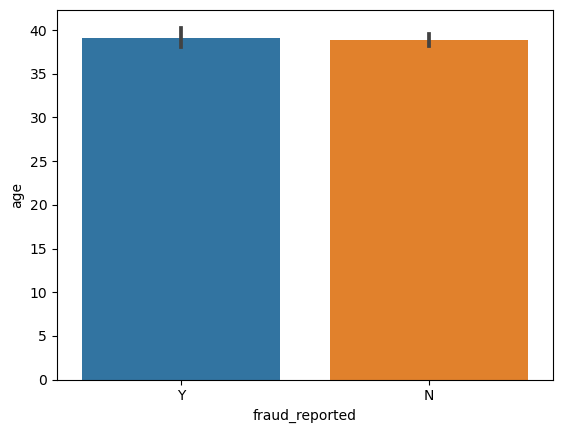

In [24]:
sns.barplot(y='age',x='fraud_reported',data=df)

<Axes: xlabel='policy_state', ylabel='count'>

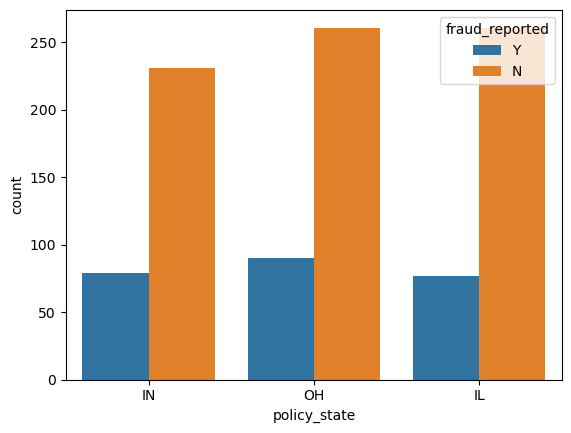

In [25]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)


<Axes: xlabel='incident_state', ylabel='count'>

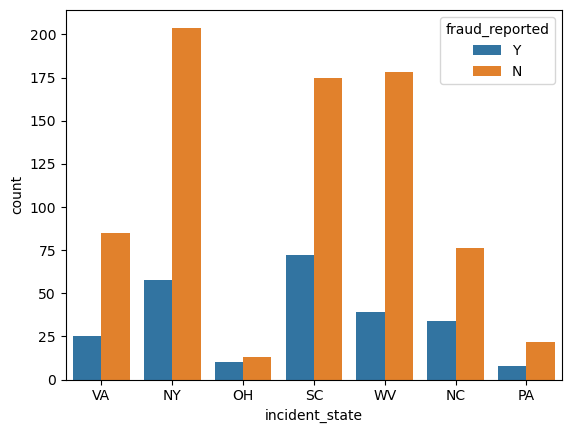

In [26]:
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

<Axes: xlabel='insured_education_level', ylabel='count'>

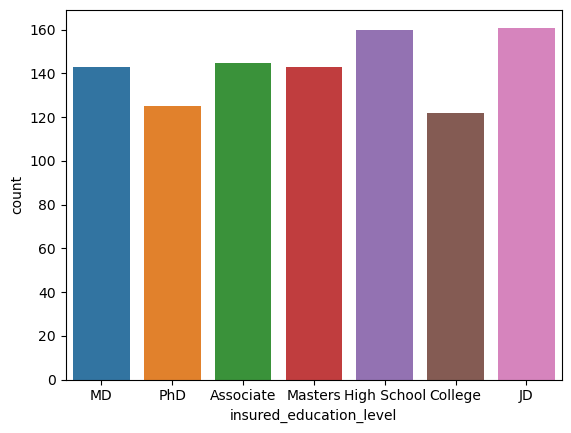

In [27]:
sns.countplot(x = 'insured_education_level', data=df) 


In [28]:
df['insured_relationship'].value_counts()

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           169
wife              155
unmarried         141
Name: count, dtype: int64

<Axes: xlabel='insured_relationship', ylabel='count'>

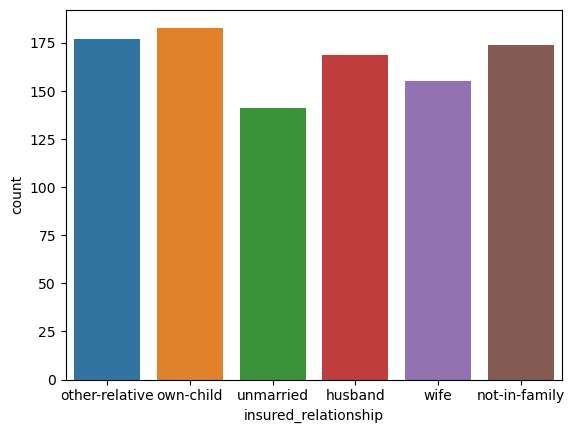

In [29]:
sns.countplot(x='insured_relationship',data=df)

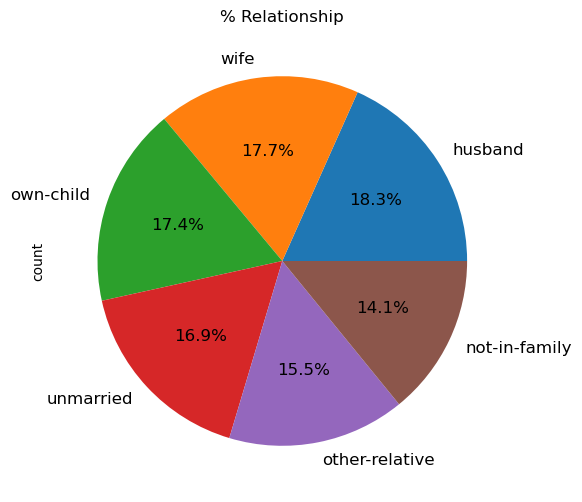

In [30]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

<Axes: xlabel='incident_type', ylabel='count'>

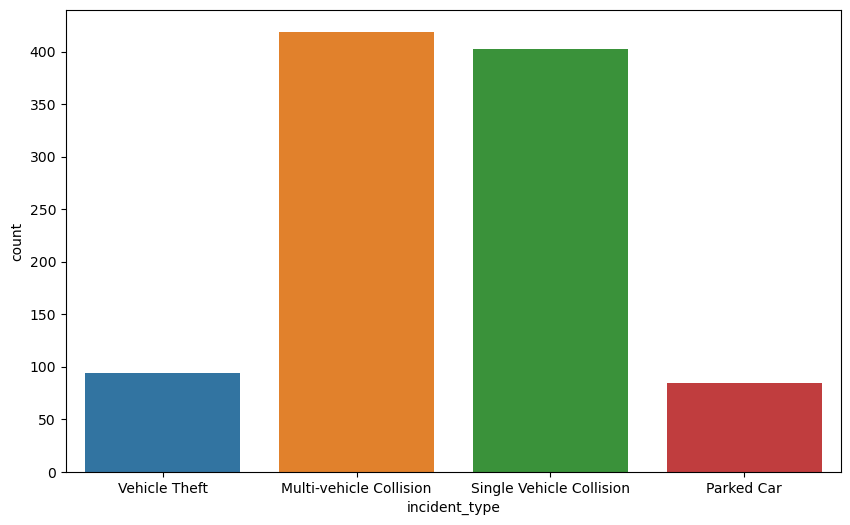

In [31]:
df['incident_type'].value_counts()
fig = plt.figure(figsize=(10,6))
sns.countplot(x='incident_type',data=df)

# incident_type vs fraud

<Axes: xlabel='incident_type', ylabel='count'>

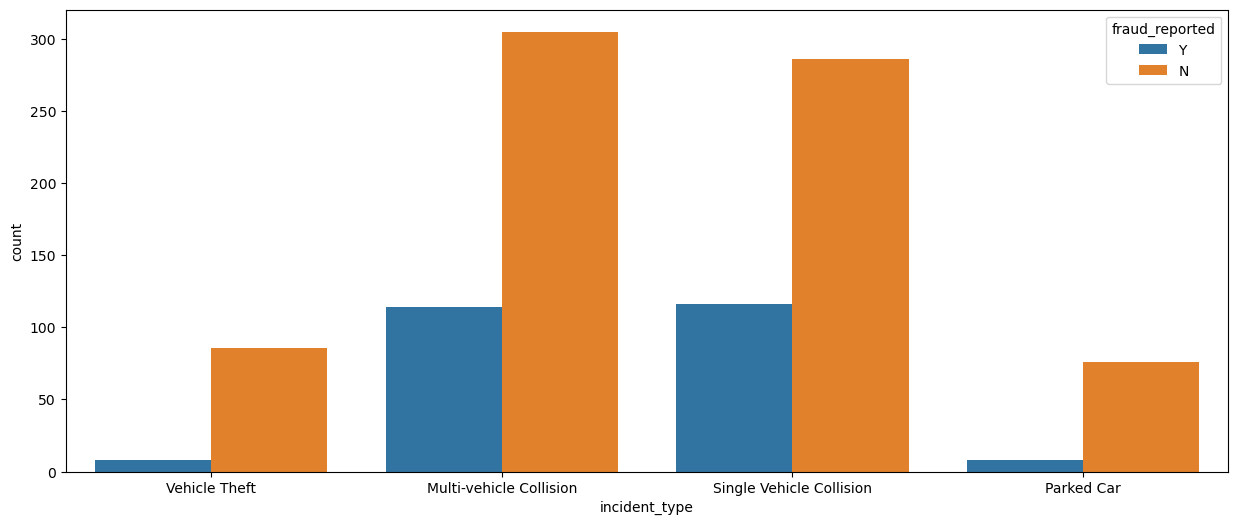

In [32]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)


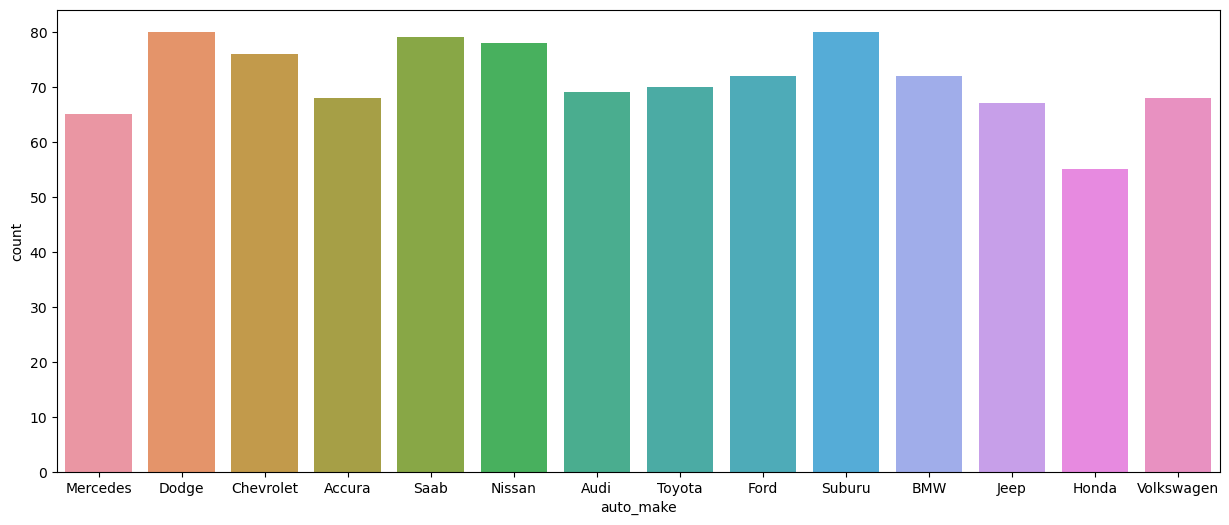

In [33]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(x='auto_make', data=df)

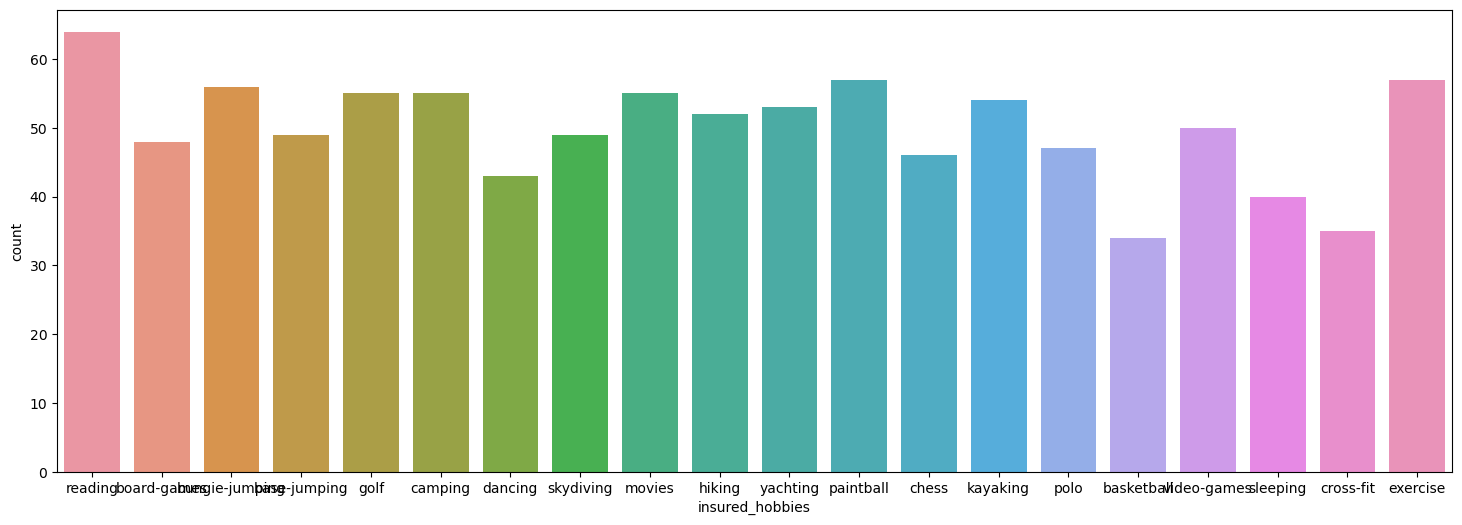

In [34]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(x='insured_hobbies', data=df)

In [35]:
df["insured_occupation"].value_counts()

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         73
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

In [36]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     275
Front Collision    254
?                  178
Name: count, dtype: int64

In [37]:
df['collision_type'].replace('?',np.nan,inplace=True)

In [38]:
df['collision_type'].value_counts()

collision_type
Rear Collision     292
Side Collision     275
Front Collision    254
Name: count, dtype: int64

In [39]:
df['incident_severity'].unique()

array(['Minor Damage', 'Major Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

<Axes: xlabel='incident_severity', ylabel='count'>

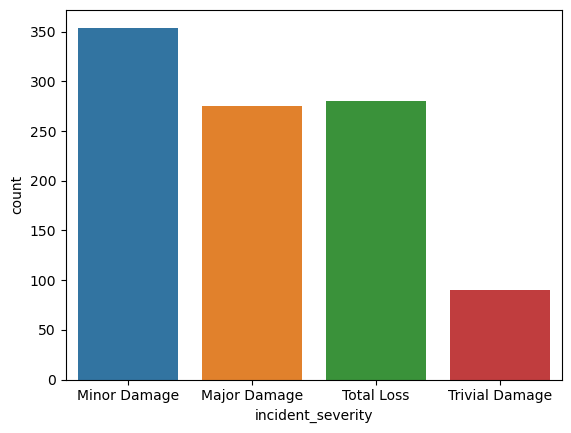

In [40]:
sns.countplot(x='incident_severity',data=df)

<Axes: xlabel='incident_severity', ylabel='count'>

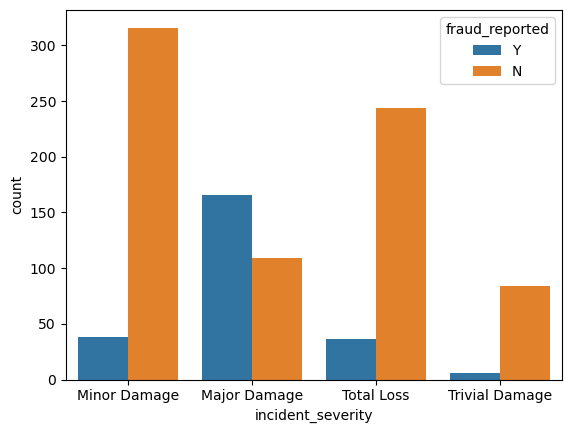

In [41]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

In [42]:
df['property_damage'].unique()

array(['?', 'NO', 'YES'], dtype=object)

In [43]:
df['property_damage'].replace('?',np.nan, inplace=True)

In [44]:
df['property_damage'].unique()

array([nan, 'NO', 'YES'], dtype=object)

<Axes: xlabel='property_damage', ylabel='count'>

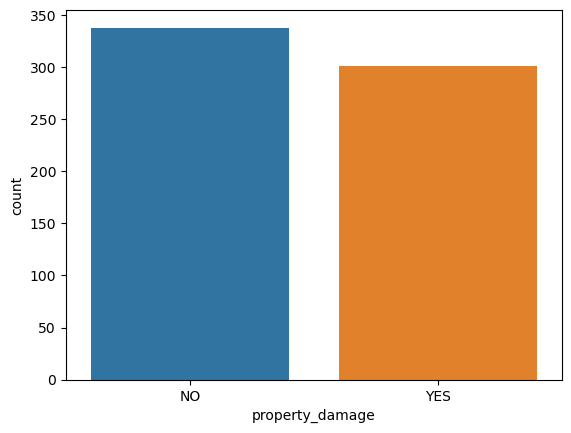

In [45]:
sns.countplot(x='property_damage',data=df)

<Axes: xlabel='property_damage', ylabel='count'>

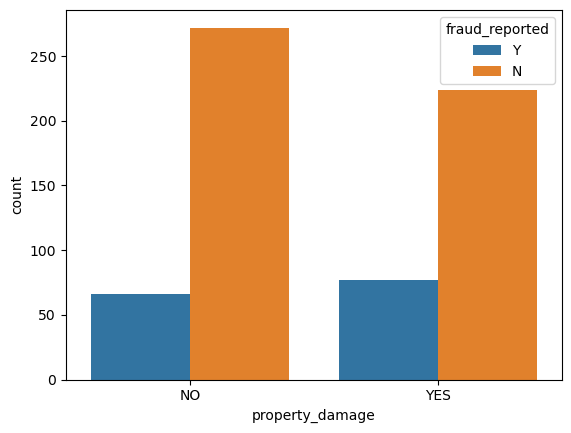

In [46]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

<Axes: xlabel='witnesses', ylabel='count'>

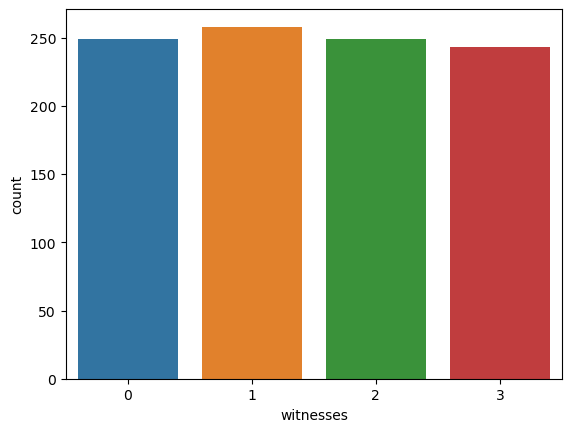

In [47]:
sns.countplot(x='witnesses',data=df)

In [48]:
df['police_report_available'].unique()

array(['?', 'NO', 'YES'], dtype=object)

In [49]:
df['police_report_available'].replace('?',np.nan, inplace=True)

In [50]:
df['police_report_available'].unique()

array([nan, 'NO', 'YES'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'E400'),
  Text(1, 0, 'RAM'),
  Text(2, 0, 'Tahoe'),
  Text(3, 0, 'RSX'),
  Text(4, 0, '95'),
  Text(5, 0, 'Pathfinder'),
  Text(6, 0, 'A5'),
  Text(7, 0, 'Camry'),
  Text(8, 0, '92x'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

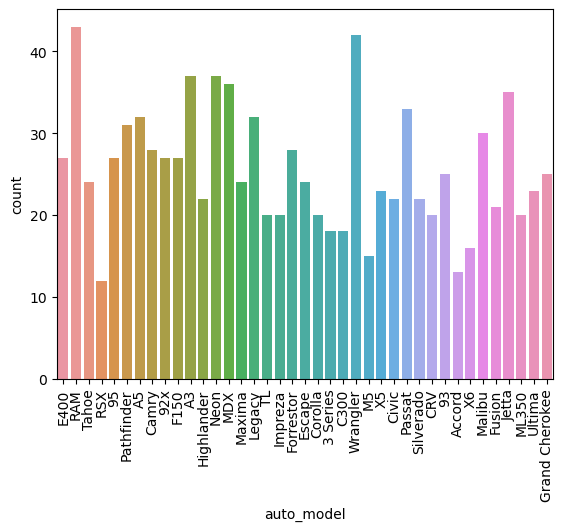

In [51]:
sns.countplot(x='auto_model',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

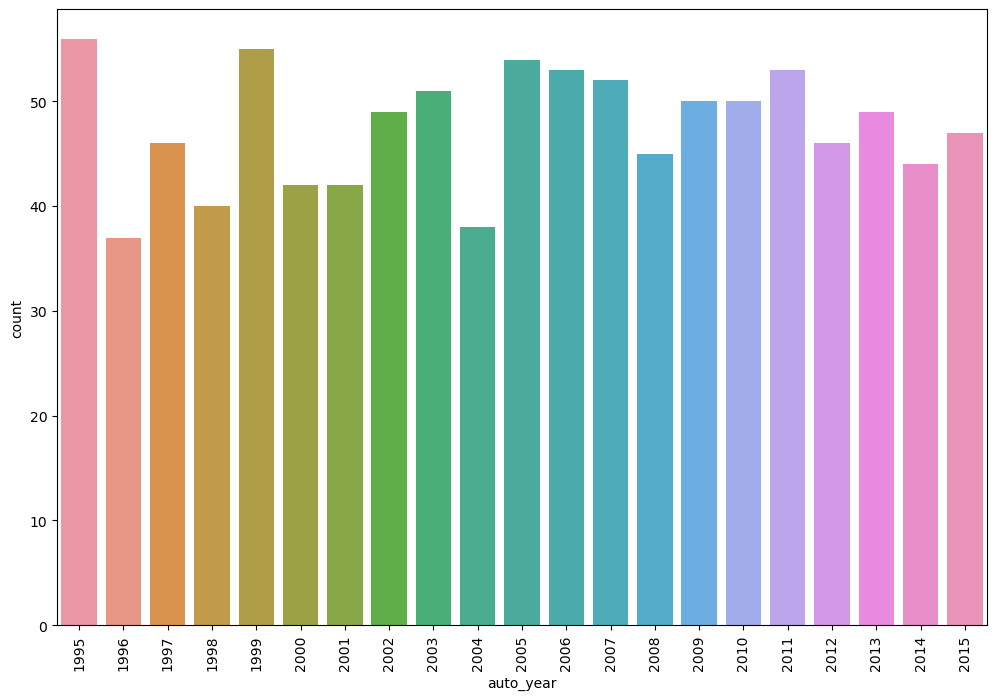

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x='auto_year',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

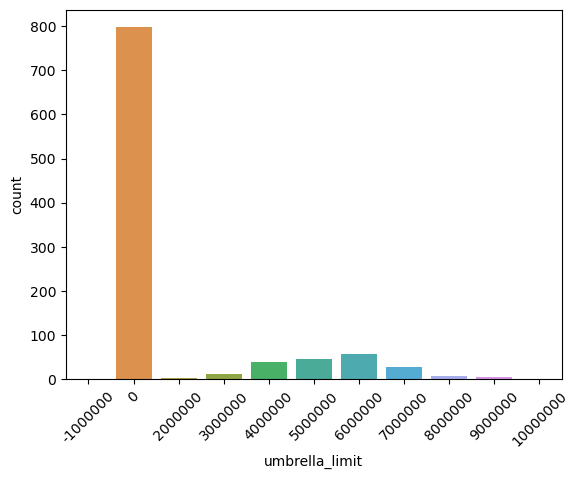

In [53]:
sns.countplot(x='umbrella_limit',data=df)
plt.xticks(rotation=45)

<Axes: xlabel='policy_deductable', ylabel='policy_annual_premium'>

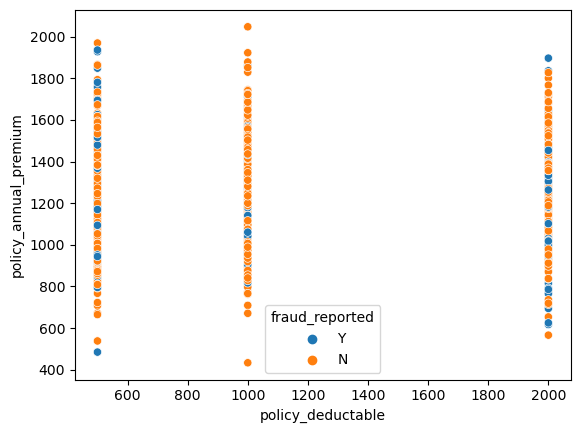

In [54]:
sns.scatterplot(x='policy_deductable',y='policy_annual_premium',hue='fraud_reported',data=df)


<Axes: xlabel='capital-loss', ylabel='capital-gains'>

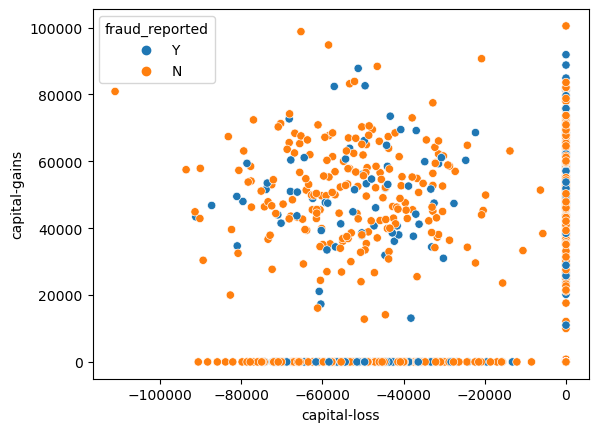

In [55]:
sns.scatterplot(x='capital-loss',y='capital-gains',hue='fraud_reported',data=df)


In [56]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [57]:
Missing_coulmn=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [58]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values)

In [60]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,820,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
1,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
2,256,41,227811,765,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
3,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
4,256,39,104594,385,2,1,1000,1351.10,0,478456,...,2,0,64100,6410,6410,51280,10,3,2003,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    int32  
 4   policy_state                 999 non-null    int32  
 5   policy_csl                   999 non-null    int32  
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    int32  
 11  insured_education_level      999 non-null    int32  
 12  insured_occupation           999 non-null    int32  
 13  insured_hobbies     

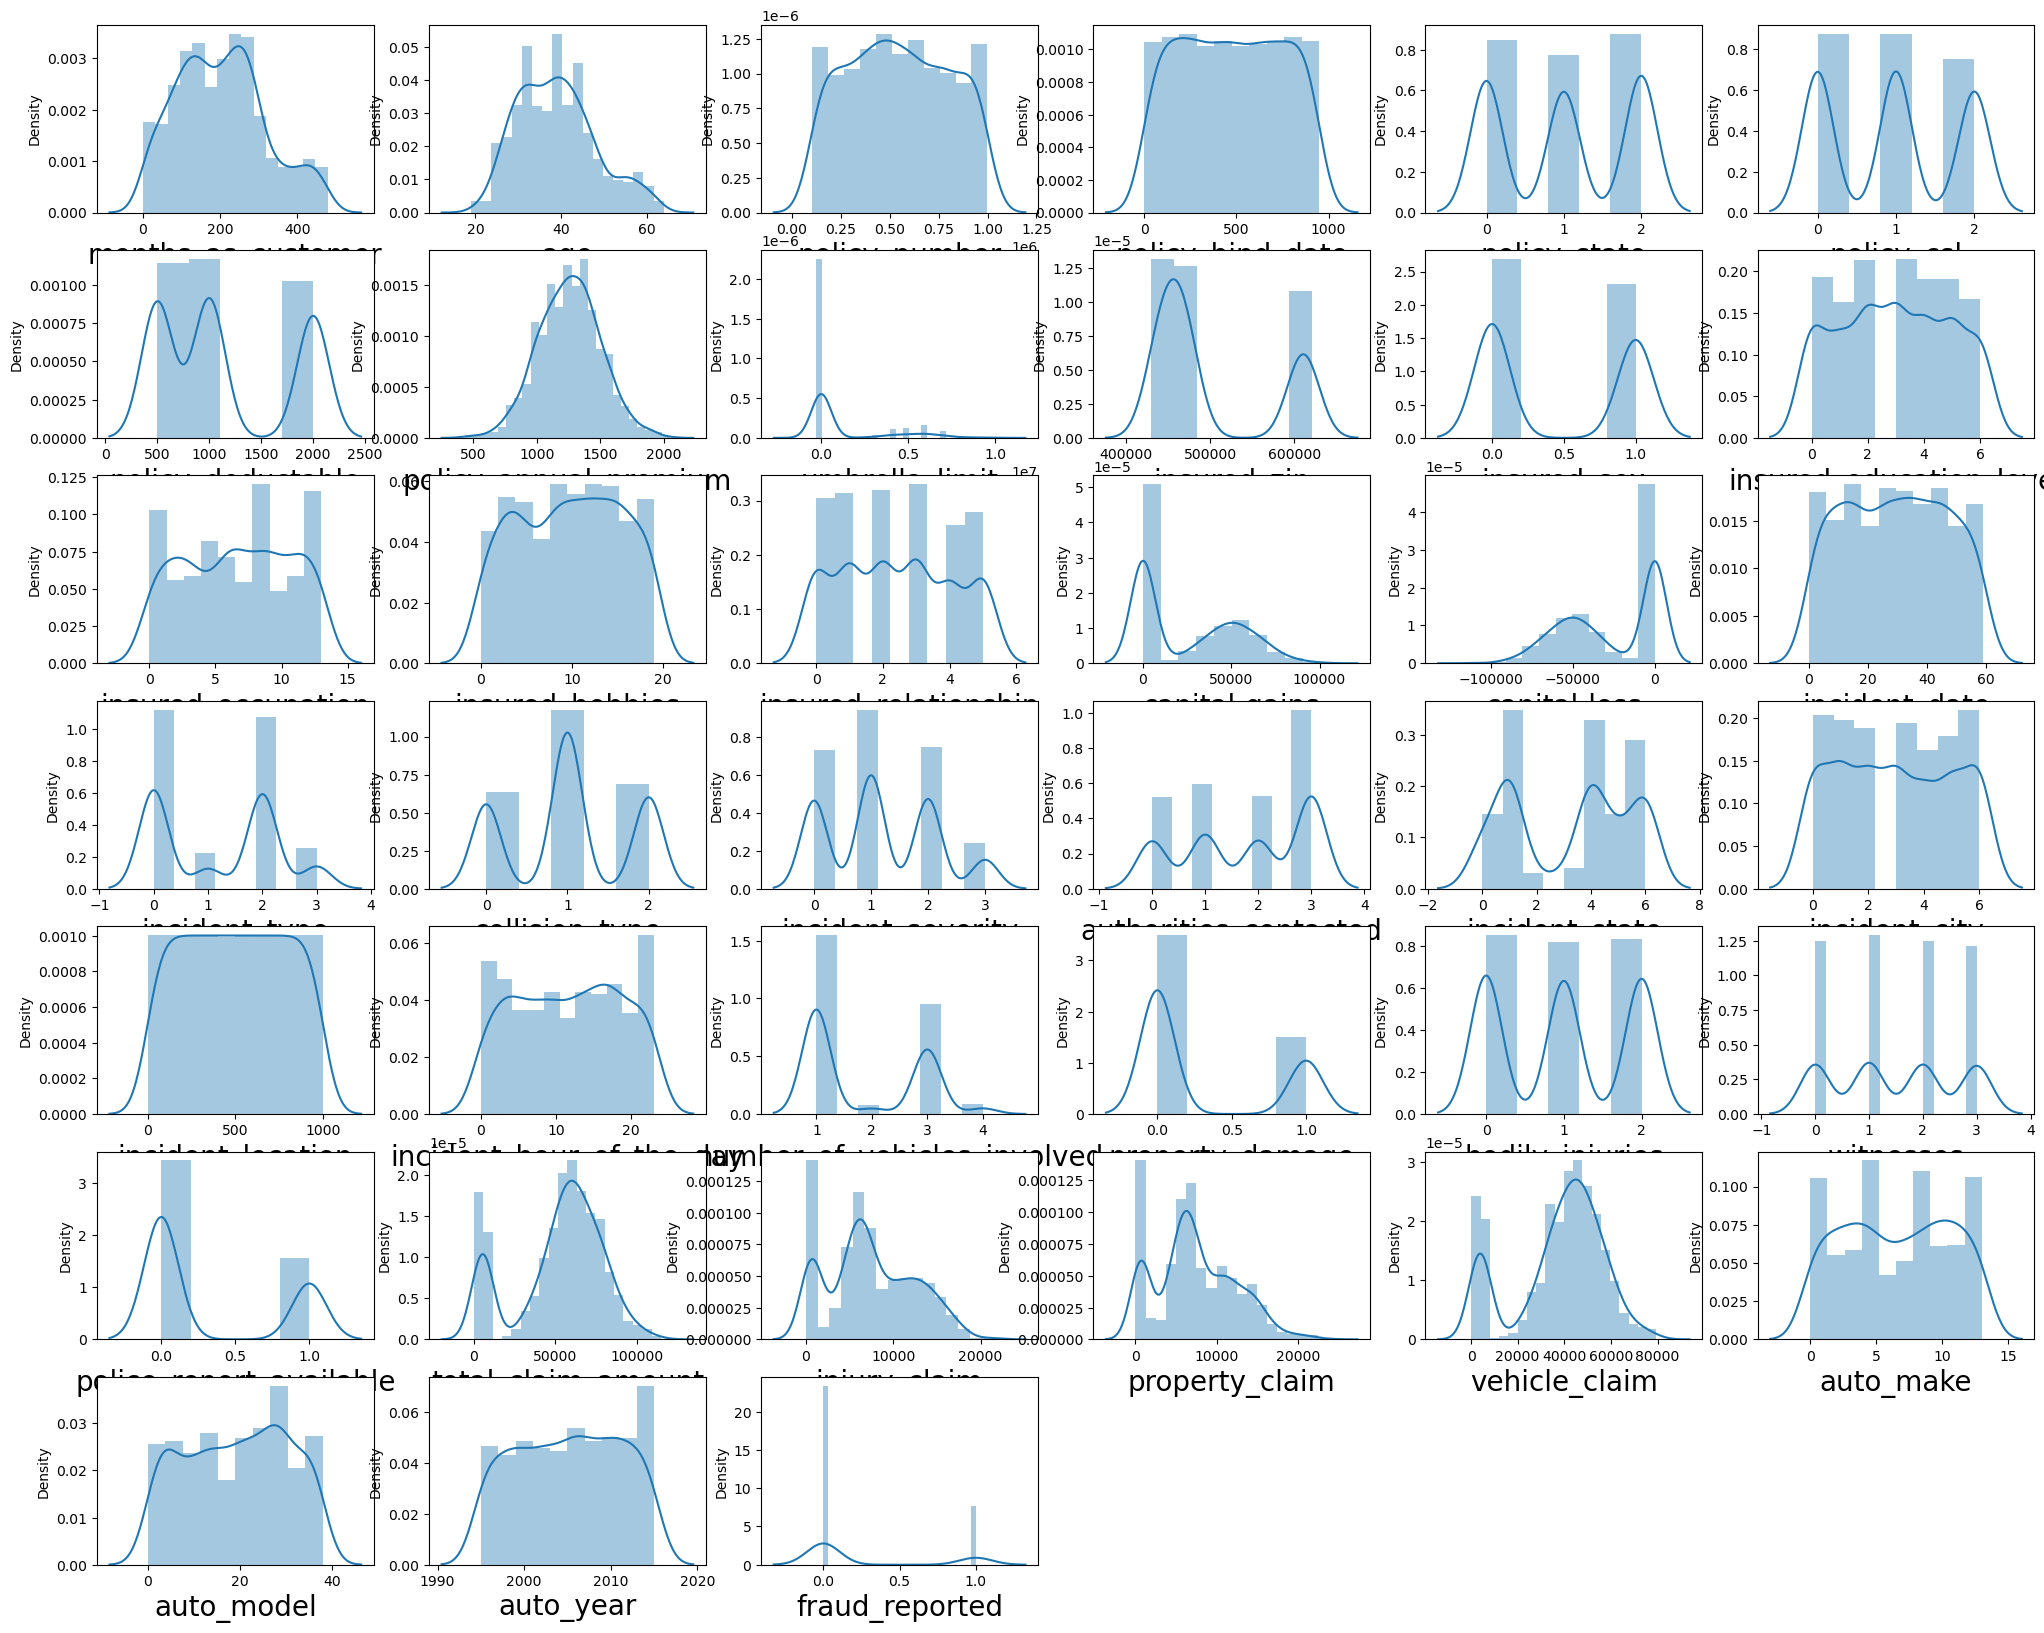

In [64]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=39:
        ax = plt.subplot(7,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

# Checking for outliers

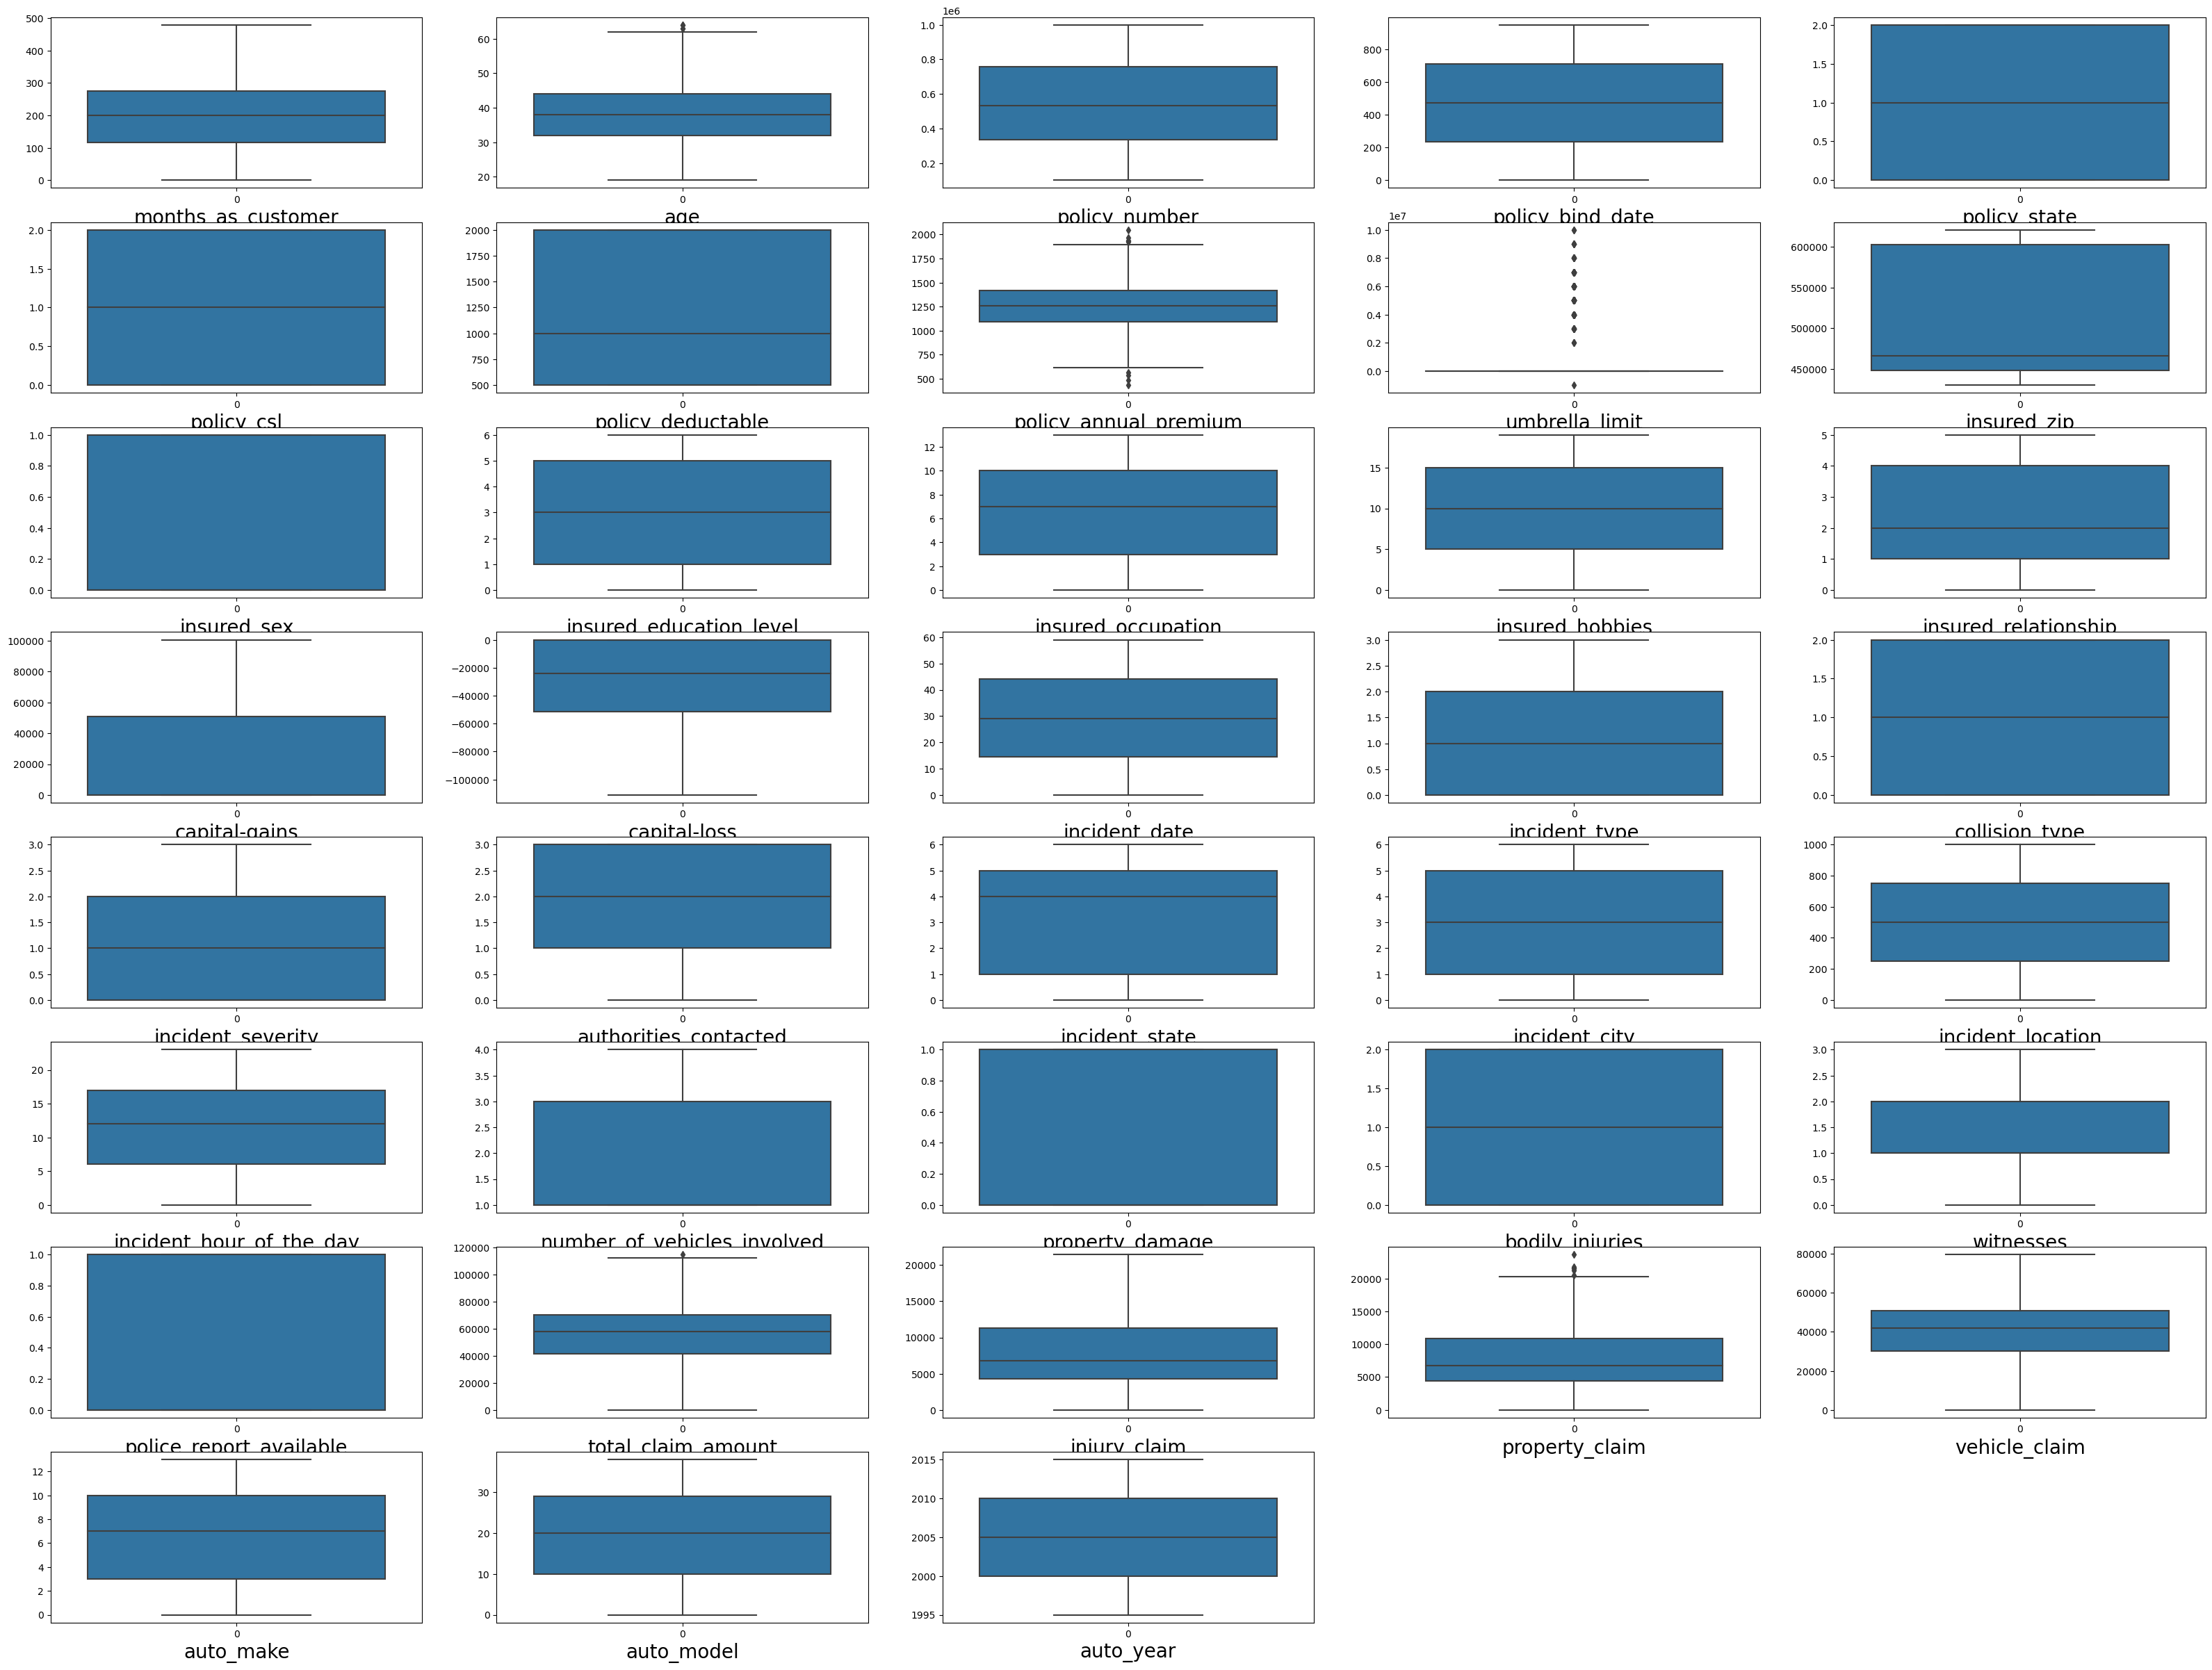

In [65]:
plt.figure(figsize=(40,30))
graph=1
for column in df:
    if graph<39:
        ax=plt.subplot(8,5,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        graph +=1
        plt.tight_layout

# Corelation matrix

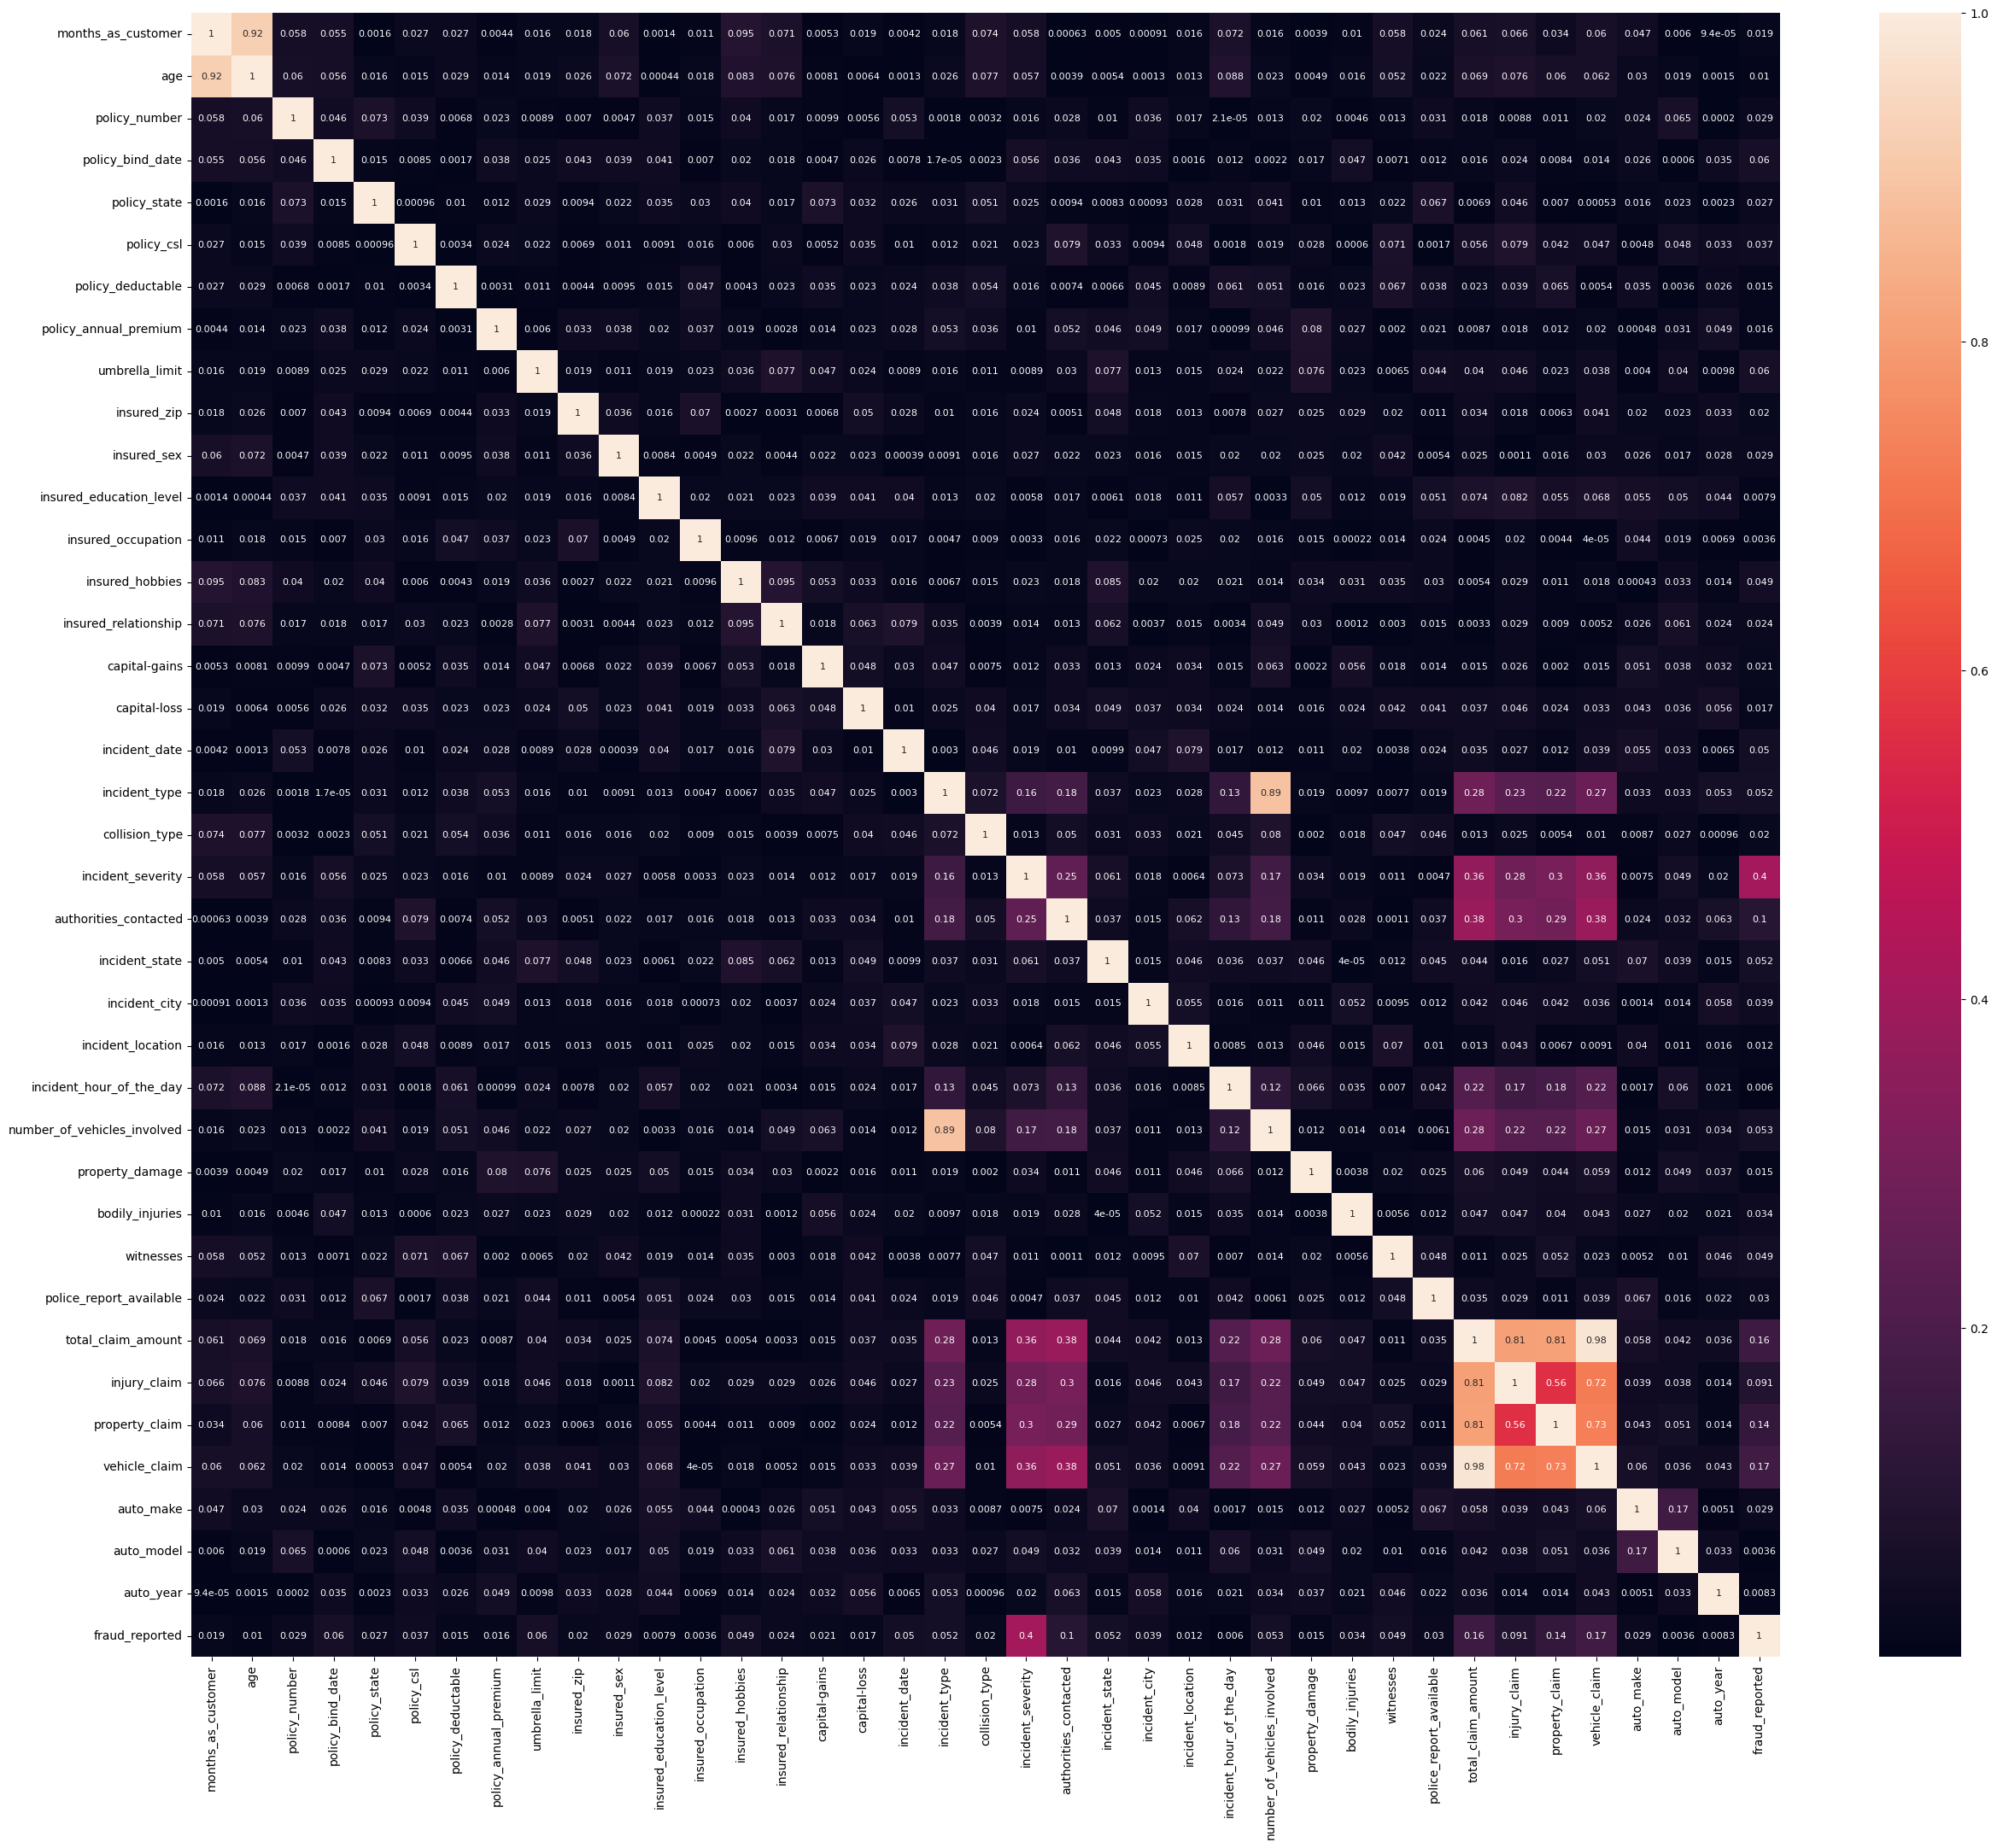

In [68]:
df_corr=df.corr().abs()
plt.figure(figsize=(30,25))
sns.heatmap(df_corr,annot=True,annot_kws={'size':8})
plt.show()

In [70]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date","policy_csl","auto_year"]
              
df1 = df.drop(deleteCols, axis=1)
df1

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,1
1,134,29,2,2000,1413.14,5000000,0,6,11,2,...,2,3,0,34650,7700,3850,23100,4,30,0
2,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,2,0,63400,6340,6340,50720,3,34,1
3,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,1,0,6500,1300,650,4550,0,31,0
4,256,39,2,1000,1351.10,0,0,6,12,3,...,0,2,0,64100,6410,6410,51280,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,2,1000,1310.80,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,0
995,285,41,0,1000,1436.79,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,0
996,130,34,2,500,1383.49,3000000,0,5,1,3,...,2,3,1,67500,7500,7500,52500,11,19,0
997,458,62,0,2000,1356.92,5000000,1,0,5,0,...,0,1,1,46980,5220,5220,36540,1,5,0


In [71]:
df1.skew()

months_as_customer             0.364615
age                            0.481461
policy_state                  -0.024326
policy_deductable              0.477027
policy_annual_premium          0.006022
umbrella_limit                 1.805104
insured_sex                    0.150802
insured_education_level        0.001298
insured_occupation            -0.060896
insured_hobbies               -0.059941
insured_relationship           0.076349
capital-gains                  0.481352
capital-loss                  -0.389813
incident_type                  0.103399
collision_type                -0.032150
incident_severity              0.277762
authorities_contacted         -0.300235
incident_state                -0.147805
incident_city                  0.047574
incident_hour_of_the_day      -0.037615
number_of_vehicles_involved    0.501009
property_damage                0.867426
bodily_injuries                0.014799
witnesses                      0.020923
police_report_available        0.806172


In [72]:
df1['umbrella_limit']=np.cbrt(df1['umbrella_limit'])
df1['property_damage']=np.cbrt(df1['property_damage'])
df1['police_report_available']=np.cbrt(df1['police_report_available'])

In [73]:
df1.skew()

months_as_customer             0.364615
age                            0.481461
policy_state                  -0.024326
policy_deductable              0.477027
policy_annual_premium          0.006022
umbrella_limit                 1.521814
insured_sex                    0.150802
insured_education_level        0.001298
insured_occupation            -0.060896
insured_hobbies               -0.059941
insured_relationship           0.076349
capital-gains                  0.481352
capital-loss                  -0.389813
incident_type                  0.103399
collision_type                -0.032150
incident_severity              0.277762
authorities_contacted         -0.300235
incident_state                -0.147805
incident_city                  0.047574
incident_hour_of_the_day      -0.037615
number_of_vehicles_involved    0.501009
property_damage                0.867426
bodily_injuries                0.014799
witnesses                      0.020923
police_report_available        0.806172


# Dividing data into Features and label

In [74]:
x= df1.drop(['fraud_reported'], axis=1)
y=df1['fraud_reported']


In [75]:
x.shape,y.shape

((999, 31), (999,))

# Feature scaling using standard scalarization

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,0.210091,0.335062,-0.015671,1.411889,-0.241829,1.925425,1.078118,0.531272,-0.163745,0.930662,...,-0.656683,-1.209559,-1.337711,-0.675476,-1.806155,-1.363354,-1.371776,-1.822197,0.361348,-0.659683
1,-0.606972,-1.087912,1.188606,1.411889,0.642651,1.925425,-0.927543,1.557849,1.081167,-1.362357,...,-0.656683,1.229087,1.362033,-0.675476,-0.685479,0.054428,-0.735038,-0.784642,-0.630374,0.958876
2,0.453472,0.225603,-1.219948,1.411889,0.653301,2.077204,-0.927543,1.557849,-1.408657,-1.362357,...,-0.656683,0.009764,0.462118,-0.675476,0.403751,-0.224211,-0.218595,0.678209,-0.878305,1.318556
3,0.210091,0.553982,-1.219948,-0.222499,1.342181,2.077204,1.078118,-1.521882,1.081167,-1.362357,...,-0.656683,-1.209559,-0.437796,-0.675476,-1.751977,-1.256815,-1.398739,-1.767115,-1.622096,1.048796
4,0.453472,0.006684,1.188606,-0.222499,0.388514,-0.496886,-0.927543,1.557849,1.330149,-1.185971,...,-0.656683,-1.209559,0.462118,-0.675476,0.430272,-0.209869,-0.204077,0.707868,0.857209,-1.468963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-1.745645,-0.102776,1.188606,-0.222499,0.223432,-0.496886,-0.927543,1.044560,-1.159675,0.577890,...,1.522806,-1.209559,-0.437796,-0.675476,1.305444,2.049976,0.275033,1.224792,-0.134513,-1.199203
995,0.705544,0.225603,-1.219948,-0.222499,0.739529,-0.496886,-0.927543,1.557849,0.583202,1.283434,...,1.522806,1.229087,1.362033,-0.675476,2.111664,2.181101,2.216360,1.822219,1.601001,0.779036
996,-0.641741,-0.540614,1.188606,-1.039694,0.521195,1.546171,-0.927543,1.044560,-1.408657,-1.185971,...,-0.656683,1.229087,1.362033,1.480437,0.559085,0.013452,0.021997,0.772484,1.105140,-0.030243
997,2.209288,2.524254,-1.219948,1.411889,0.412355,1.925425,1.078118,-1.521882,-0.412728,-1.715129,...,-0.656683,-1.209559,-0.437796,1.480437,-0.218341,-0.453679,-0.450891,-0.072813,-1.374166,-1.289123


# Variance influance factor

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,6.820304,months_as_customer
1,6.833727,age
2,1.030856,policy_state
3,1.035912,policy_deductable
4,1.031681,policy_annual_premium
5,1.031738,umbrella_limit
6,1.022842,insured_sex
7,1.035442,insured_education_level
8,1.013587,insured_occupation
9,1.047790,insured_hobbies


In [83]:
# However Total claim is the total of injury_claim + property_claim + vehicle_claim
# Delete total_claim_amount
x.drop('total_claim_amount',axis=1,inplace=True)




KeyError: "['total_claim_amount'] not found in axis"

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,VIF values,features
0,6.820304,months_as_customer
1,6.833727,age
2,1.030856,policy_state
3,1.035912,policy_deductable
4,1.031681,policy_annual_premium
5,1.031738,umbrella_limit
6,1.022842,insured_sex
7,1.035442,insured_education_level
8,1.013587,insured_occupation
9,1.047790,insured_hobbies


In [84]:
x.drop('age',axis=1)

,months_as_customer,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,0.210091,-0.015671,1.411889,-0.241829,1.925425,1.078118,0.531272,-0.163745,0.930662,-0.249168,...,-0.824557,-0.656683,-1.209559,-1.337711,-0.675476,-1.363354,-1.371776,-1.822197,0.361348,-0.659683
1,-0.606972,1.188606,1.411889,0.642651,1.925425,-0.927543,1.557849,1.081167,-1.362357,0.346332,...,1.139049,-0.656683,1.229087,1.362033,-0.675476,0.054428,-0.735038,-0.784642,-0.630374,0.958876
2,0.453472,-1.219948,1.411889,0.653301,2.077204,-0.927543,1.557849,-1.408657,-1.362357,0.941831,...,-0.824557,-0.656683,0.009764,0.462118,-0.675476,-0.224211,-0.218595,0.678209,-0.878305,1.318556
3,0.210091,-1.219948,-0.222499,1.342181,2.077204,1.078118,-1.521882,1.081167,-1.362357,0.941831,...,-0.824557,-0.656683,-1.209559,-0.437796,-0.675476,-1.256815,-1.398739,-1.767115,-1.622096,1.048796
4,0.453472,1.188606,-0.222499,0.388514,-0.496886,-0.927543,1.557849,1.330149,-1.185971,0.941831,...,1.139049,-0.656683,-1.209559,0.462118,-0.675476,-0.209869,-0.204077,0.707868,0.857209,-1.468963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-1.745645,1.188606,-0.222499,0.223432,-0.496886,-0.927543,1.044560,-1.159675,0.577890,0.941831,...,-0.824557,1.522806,-1.209559,-0.437796,-0.675476,2.049976,0.275033,1.224792,-0.134513,-1.199203
995,0.705544,-1.219948,-0.222499,0.739529,-0.496886,-0.927543,1.557849,0.583202,1.283434,1.537331,...,-0.824557,1.522806,1.229087,1.362033,-0.675476,2.181101,2.216360,1.822219,1.601001,0.779036
996,-0.641741,1.188606,-1.039694,0.521195,1.546171,-0.927543,1.044560,-1.408657,-1.185971,-0.249168,...,1.139049,-0.656683,1.229087,1.362033,1.480437,0.013452,0.021997,0.772484,1.105140,-0.030243
997,2.209288,-1.219948,1.411889,0.412355,1.925425,1.078118,-1.521882,-0.412728,-1.715129,1.537331,...,-0.824557,-0.656683,-1.209559,-0.437796,1.480437,-0.453679,-0.450891,-0.072813,-1.374166,-1.289123


# MODEL BUILDING:

Finding best random state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print("Best accuracy is",maxAccu,"at random state",maxRS)

Best accuracy is 0.7633333333333333 at random state 1
Best accuracy is 0.8 at random state 3
Best accuracy is 0.8233333333333334 at random state 18


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# classification Algorithms

In [103]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [104]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.83
[[227   7]
 [ 44  22]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       234
           1       0.76      0.33      0.46        66

    accuracy                           0.83       300
   macro avg       0.80      0.65      0.68       300
weighted avg       0.82      0.83      0.80       300



# ExtraTreesClassifier

In [105]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.79
[[226   8]
 [ 55  11]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       234
           1       0.58      0.17      0.26        66

    accuracy                           0.79       300
   macro avg       0.69      0.57      0.57       300
weighted avg       0.75      0.79      0.74       300



# logisticRegression

In [106]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8433333333333334
[[225   9]
 [ 38  28]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       234
           1       0.76      0.42      0.54        66

    accuracy                           0.84       300
   macro avg       0.81      0.69      0.72       300
weighted avg       0.83      0.84      0.83       300



# SVC

In [107]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.78
[[233   1]
 [ 65   1]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       234
           1       0.50      0.02      0.03        66

    accuracy                           0.78       300
   macro avg       0.64      0.51      0.45       300
weighted avg       0.72      0.78      0.69       300



# AdaBoost

In [108]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada))
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

0.8466666666666667
[[222  12]
 [ 34  32]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       234
           1       0.73      0.48      0.58        66

    accuracy                           0.85       300
   macro avg       0.80      0.72      0.74       300
weighted avg       0.84      0.85      0.83       300



In [109]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.84
[[213  21]
 [ 27  39]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       234
           1       0.65      0.59      0.62        66

    accuracy                           0.84       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.84      0.84      0.84       300



# Decision tree classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8033333333333333
[[193  41]
 [ 18  48]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87       234
           1       0.54      0.73      0.62        66

    accuracy                           0.80       300
   macro avg       0.73      0.78      0.74       300
weighted avg       0.83      0.80      0.81       300



# Cross Validation

In [111]:
#cross validation of Random Forest
score=cross_val_score(RFC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predRFC)-score.mean())

score
0.7707939698492463
Diff between acc_score and cross validation- 0.05920603015075365


In [112]:
score=cross_val_score(ET,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predET)-score.mean())

score
0.7577839195979899
Diff between acc_score and cross validation- 0.03221608040201018


In [113]:
score=cross_val_score(LR,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predLR)-score.mean())

score
0.7748040201005024
Diff between acc_score and cross validation- 0.06852931323283096


In [114]:
score=cross_val_score(svc,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predsvc)-score.mean())

score
0.7507537688442211
Diff between acc_score and cross validation- 0.029246231155778957


In [115]:
score=cross_val_score(ada,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predada)-score.mean())

score
0.8008442211055276
Diff between acc_score and cross validation- 0.045822445561139125


In [116]:
score=cross_val_score(BC,x,y)
print("score")
print(score.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predBC)-score.mean())

score
0.8078140703517589
Diff between acc_score and cross validation- 0.032185929648241074


In [117]:
#cross validation for decision trees
score4=cross_val_score(DT,x,y)
print("score4")
print(score4.mean())
print("Diff between acc_score and cross validation-",accuracy_score(y_test,predDT)-score4.mean())

score4
0.7677889447236181
Diff between acc_score and cross validation- 0.035544388609715205


the difference beween acc_score and cross validation is less in decision tree classifier,os,iam using decision tree for model

# Hyper parameter tuning

In [121]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [126]:
grid= GridSearchCV(DecisionTreeClassifier(),cv=5, n_jobs=-1,param_grid=params)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [127]:
grid.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [129]:
Final_model=DecisionTreeClassifier(max_depth=None,min_samples_leaf=4,min_samples_split=2)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.66666666666667


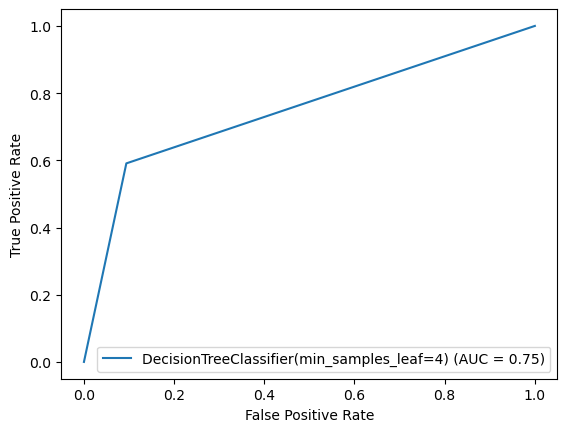

In [130]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [131]:
import joblib
joblib.dump(Final_model,"Insurance claim fraud detection.pkl")

['Insurance claim fraud detection.pkl']

# Predicting the saved model

In [132]:
model=joblib.load("Insurance claim fraud detection.pkl")
prediction=model.predict(x_test)

In [133]:
a=np.array(y_test)
df=pd.DataFrame()
df["prediction"]=prediction
df["original"]=a
df

,prediction,original
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
295,0,0
296,0,1
297,0,0
298,0,0
